In [154]:
import pandas as pd
import numpy as np
import scipy as sc 
import matplotlib.pyplot as plt
import matplotlib
import datetime
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

#Maintenance data
#TruckEventData = pd.read_csv('data/workshop-content18/1-ssr/data/Maintenance/TruckEventHistory.csv')
#EquipStat = pd.read_csv('data/workshop-content18/1-ssr/data/Maintenance/EquipmentStatus.csv')
#NotDetReport = pd.read_csv('data/workshop-content18/1-ssr/data/Maintenance/NotificationDetailsReport.csv')
#WorkOrder = pd.read_csv('data/workshop-content18/1-ssr/data/Maintenance/WorkOrders.csv')
    #Individual trucks
TruckNumber = '476'
TruckHT = pd.read_csv('data/workshop-content18/1-ssr/data/Maintenance/TruckMachineData/TruckMachineData_HT'+str(TruckNumber)+'.csv')

pd.options.mode.chained_assignment = None #to suppress warnings
params = list(set(TruckHT['Parameter']))
count = 0
TruckParameters = pd.DataFrame()

for parameter in params:
    TruckParameter = TruckHT[TruckHT['Parameter'] == parameter]
    TruckParameter = TruckParameter[['ParameterValue','ParameterReadTime1']]
    TruckParameter['ParameterReadTime1'] = pd.to_datetime(TruckParameter['ParameterReadTime1'])
    TruckParameter = TruckParameter.sort_values(by='ParameterReadTime1')
    TruckParameter = TruckParameter.set_index(['ParameterReadTime1'])
    TruckParameter = TruckParameter.resample('D').mean()
    if count == 0:
        TruckParameters['Date'] = TruckParameter.index
        TruckParameters = TruckParameters.set_index(['Date'])
    TruckParameters[parameter] = TruckParameter['ParameterValue']

    count += 1
    
listNew = TruckParameters.isna().sum()
list2 = []
max(listNew.index)
for i in range(len(listNew)):
    if (listNew[i] > 260):
        list2.append(listNew.index[i])  

        
NewMatrix = TruckParameters.drop(list2,axis=1)        
corel = NewMatrix.corr()
plt.figure(2)
plt.figure( figsize=(9,9) )

plt.imshow(corel, interpolation='nearest', cmap=plt.cm.ocean)

plt.colorbar()

plt.show()


TypeError: drop() got an unexpected keyword argument 'label'

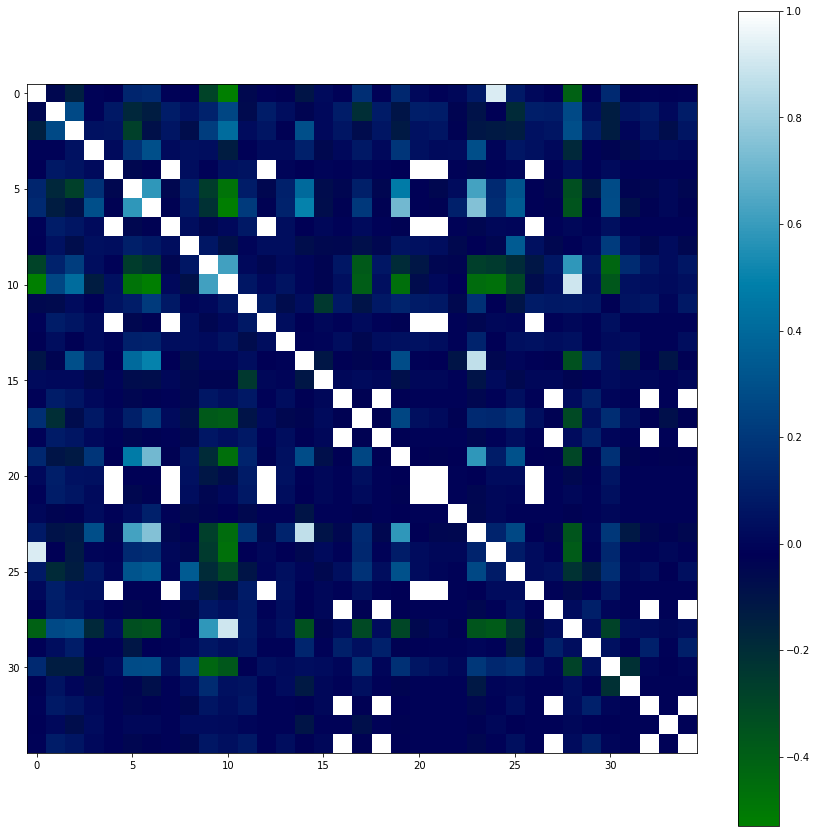

In [159]:
NewMatrix = TruckParameters.drop(list2,axis=1)        
corel = NewMatrix.corr()
plt.figure(2)
plt.figure( figsize=(15,15) )

plt.imshow(corel, interpolation='nearest', cmap=plt.cm.ocean)

plt.colorbar()

plt.show()
    

In [47]:
import pandas as pd
import numpy as np
import scipy as sc 
import matplotlib.pyplot as plt
import matplotlib
import datetime
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import Imputer

In [51]:
#Maintenance data
#TruckEventData = pd.read_csv('data/workshop-content18/1-ssr/data/Maintenance/TruckEventHistory.csv')
#EquipStat = pd.read_csv('data/workshop-content18/1-ssr/data/Maintenance/EquipmentStatus.csv')
#NotDetReport = pd.read_csv('data/workshop-content18/1-ssr/data/Maintenance/NotificationDetailsReport.csv')
WorkOrder = pd.read_csv('data/workshop-content18/1-ssr/data/Maintenance/WorkOrders.csv')
    #Individual trucks
TruckNumber = '476'
TruckHT = pd.read_csv('data/workshop-content18/1-ssr/data/Maintenance/TruckMachineData/TruckMachineData_HT'+str(TruckNumber)+'.csv')


In [1]:
#Production
#ProdDet = pd.read_csv('data/workshop-content18/1-ssr/data/Production/ProductionDetails.csv')
#TruckProdSumm = pd.read_csv('data/workshop-content18/1-ssr/data/Production/TruckProductionSummary.csv')

#Supplimental
#ReasonStatusData = pd.read_csv('data/workshop-content18/1-ssr/data/Supplemental/ReasonStatusTable.csv')
#EquipList = pd.read_csv('data/workshop-content18/1-ssr/data/Supplemental/EquipmentList.csv')
#WeatherData = pd.read_csv('data/workshop-content18/1-ssr/data/Supplemental/MarigoldWeatherData.csv')
#OilData = pd.read_csv('data/workshop-content18/1-ssr/data/Supplemental/OilAnalysisData.csv')


In [52]:
# Set up for Logistic Regression Model (X-Matrix)
pd.options.mode.chained_assignment = None #to suppress warnings
params = list(set(TruckHT['Parameter']))
count = 0
TruckParameters = pd.DataFrame()

for parameter in params:
    TruckParameter = TruckHT[TruckHT['Parameter'] == parameter]
    TruckParameter = TruckParameter[['ParameterValue','ParameterReadTime1']]
    TruckParameter['ParameterReadTime1'] = pd.to_datetime(TruckParameter['ParameterReadTime1'])
    TruckParameter = TruckParameter.sort_values(by='ParameterReadTime1')
    TruckParameter = TruckParameter.set_index(['ParameterReadTime1'])
    TruckParameter = TruckParameter.resample('D').mean()
    if count == 0:
        TruckParameters['Date'] = TruckParameter.index
        TruckParameters = TruckParameters.set_index(['Date'])
    TruckParameters[parameter] = TruckParameter['ParameterValue']

    count += 1


In [69]:
# Set up for Logistic Regression Model (Y-values)
TruckNumber = 476
TruckWO = WorkOrder[WorkOrder['COMPID'] == TruckNumber]
TruckWORepairDates = TruckWO[(TruckWO['SCHEDULED'] == 'UNSCHEDULED')]
TruckWORepairDates = TruckWORepairDates[['DATE_WO','SCHEDULED']]
TruckWORepairDates['DATE_WO'] = pd.to_datetime(TruckWORepairDates['DATE_WO'])
TruckWORepairDates = TruckWORepairDates.set_index(['DATE_WO'])
ColO1 = np.ones(len(TruckWORepairDates))
TruckWORepairDates['Label'] = ColO1
TruckWORepairDates = TruckWORepairDates.resample('D').max()
TruckWORepairDates = TruckWORepairDates.drop('SCHEDULED', axis=1)
TruckWORepairDates = TruckWORepairDates.fillna(0)

dist = len(TruckParameters) - len(TruckWORepairDates)
axisVal = 1+np.arange(dist)
ZeroCol = np.zeros((dist))
base = TruckWORepairDates.index[-1]
dateArray = np.array([base + datetime.timedelta(days=np.float64(i)) for i in axisVal])
ColSer = pd.Series(ZeroCol,index=dateArray)
TruckWORepairDates = TruckWORepairDates['Label'].append(ColSer)


In [54]:
TruckParameters.isna().sum()

Engine Intercooler Temperature                               160
Shift Lever Forward (EH5000)                                  45
Motor B DE Bearing Temperature (EH5000)                      169
Fuel Flow Rate                                               343
Steer Accumulator 2 Pressure (EH5000)                         42
Park Brake Oil Pressure (EH5000)                             115
Battery Power Voltage                                        150
Truck Speed (EH5000)                                          18
Turbocharger Charge Pressure                                 194
Payload Limit (EH5000)                                        23
Motor A DE Bearing Temperature (EH5000)                      169
Park Brake Press Switch (EH5000)                             115
Drive System Fault Number for Oper. (Shutdown) 7 (EH5000)    169
Fuel Level (EH5000)                                          258
Optimum Load Signal                                          357
Intake Pipe Air Temperatu

In [137]:
# Logistic Regression
imputer = Imputer()

listNew = TruckParameters.isna().sum()
list2 = []
for i in range(len(listNew)):
    if (listNew[i] > 130):
        list2.append(listNew.index[i])
        
TruckParametersClean = TruckParameters.drop(list2,axis=1) 



X = TruckParametersClean.values
Y = TruckWORepairDates.values
#np.random.seed(0)
m,n = X.shape
shuffle = np.random.permutation(np.arange(X.shape[0]))
#NewIndex = np.arange(m)
#X = X.set_index(NewIndex)
#Y = Y.reindex(NewIndex)
X, Y = X[shuffle], Y[shuffle]
X = imputer.fit_transform(X)

X_train, Y_train = X[:int(m*0.6)], Y[:int(m*0.6)]
X_test, Y_test = X[int(m*0.6):], Y[int(m*0.6):]

scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
X_train_scaled_d2 = poly.fit_transform(X_train_scaled)
X_test_scaled_d2 = poly.fit_transform(X_test_scaled)

# Split into train and test.


#Actual model
lr = LogisticRegression()
lr.fit(X_train_scaled_d2, Y_train)
preds = lr.predict(X_test_scaled_d2)
accuracy = np.mean(preds == Y_test)
print("Accuracy is: ", accuracy)
#print("Predictions:    ", preds[:20])
#print("Correct labels: ", Y_test[:20])

Accuracy is:  0.777777777778


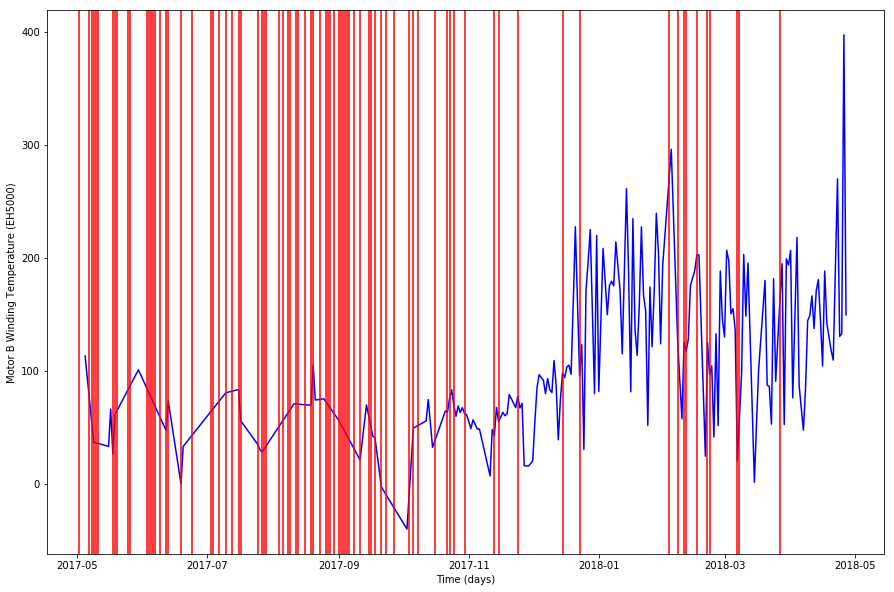

In [67]:
#Work Orders and Truck Parameters
#filtering out for one truck
pd.options.mode.chained_assignment = None #to suppress warnings
Parameter = 'Motor B Winding Temperature (EH5000)'
params = list(set(TruckHT['Parameter']))
TruckNumber = 476

TruckWO = WorkOrder[WorkOrder['COMPID'] == TruckNumber]
TruckWORepairDates = TruckWO[(TruckWO['SCHEDULED'] == 'UNSCHEDULED')]
TruckWORepairDates = TruckWORepairDates[['DATE_WO','SCHEDULED']]
TruckWORepairDates['DATE_WO'] = pd.to_datetime(TruckWORepairDates['DATE_WO'])
TruckWORepairDates = TruckWORepairDates.set_index(['DATE_WO'])
ColO1 = np.ones(len(TruckWORepairDates))
TruckWORepairDates['Label'] = ColO1
TruckWORepairDates = TruckWORepairDates.resample('D').max()
TruckWORepairDates = TruckWORepairDates.drop('SCHEDULED', axis=1)
TruckWORepairDates = TruckWORepairDates.fillna(0)


TruckParameter = TruckHT[TruckHT['Parameter'] == Parameter]
TruckParameter['ParameterReadTime1'] = pd.to_datetime(TruckParameter['ParameterReadTime1'])
TruckParameter = TruckParameter.sort_values(by='ParameterReadTime1')


TruckParameter = TruckParameter[['ParameterValue','ParameterReadTime1']]
TruckParameter = TruckParameter.set_index(['ParameterReadTime1'])
TruckParameter = TruckParameter.resample('D').mean()
    
TruckParameter = TruckParameter.dropna()

plt.figure(1)
plt.figure(figsize = (15,10))
plt.plot(TruckParameter.index ,TruckParameter['ParameterValue'], color='b')
plt.xlabel('Time (days)')
plt.ylabel(Parameter)
#plt.xlim(pd.Timestamp('2017-08-06'),pd.Timestamp('2017-09-06'))



for i in TruckWORepairDates.index:
    if TruckWORepairDates['Label'][i] == 1:
        plt.axvline(x=i, color='r')


In [121]:
#Making PCA Matrix
pd.options.mode.chained_assignment = None #to suppress warnings
params = list(set(TruckHT1['Parameter']))
TruckParameters = pd.DataFrame()
TruckHT1 = TruckHT[TruckHT['Level'] == 1]
Index = TruckHT['EventTime1']
TruckParameters['Date'] = pd.to_datetime(Index)
TruckParameters = TruckParameters.set_index(['Date']) 
TruckParameters = TruckParameters[~TruckParameters.index.duplicated()]

for parameter in params:
    TruckParameter = TruckHT1[TruckHT1['Parameter'] == parameter]
    TruckParameter = TruckParameter[['ParameterValue','EventTime1']]
    TruckParameter['EventTime1'] = pd.to_datetime(TruckParameter['EventTime1'])
    TruckParameter = TruckParameter.sort_values(by='EventTime1')
    TruckParameter = TruckParameter.set_index(['EventTime1'])
    TruckParameter = TruckParameter[~TruckParameter.index.duplicated()]
    TruckParameters[parameter] = np.zeros(TruckParameters.shape[0])
    for idx, row in TruckParameter.iterrows():
        #TruckParameters[parameter] = np.zeros(TruckParameters.shape[0])
        TruckParameters[parameter][idx] = row['ParameterValue']

In [182]:
#Cleaning the matrix
l,k = TruckParameters.shape
colNames = list(TruckParameters.columns.values)

for col in colNames:
    if (TruckParameters[col].isna().sum() == l):
        TruckParameters.drop(col, axis=1)
    else:
        NoNan = []
        medianV = TruckParameters[col].median()
        TruckParameters[col].fillna(medianV)